Download file from google drive

In [1]:
! gdown --id 1JZH4rC-XlDFeXiKLmFiBXmqf62KMWU2p

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JZH4rC-XlDFeXiKLmFiBXmqf62KMWU2p
To: /content/unique_m.csv
100% 4.29M/4.29M [00:00<00:00, 57.9MB/s]


Basic Linear Regression model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4259
[LightGBM] [Info] Number of data points in the train set: 17010, number of used features: 77
[LightGBM] [Info] Start training from score 34.533301
Mean Squared Error (MSE): 106.94
R-squared (R²): 0.91
Highest Transition Temperature: 134.50 K
Chemical Composition with Highest Transition Temperature: O5.94Cu1.0Ba2.0Tl2.0


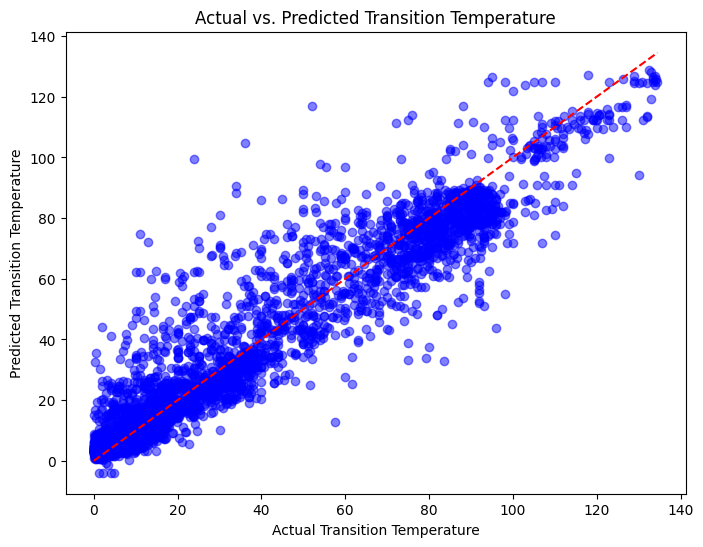

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("unique_m.csv")

# Extract features (elemental compositions) and target (transition temperature)
X = data.iloc[:, :-2].values  # Exclude the last two columns
y = data.iloc[:, -2].values  # Second last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LightGBM regression model
model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict transition temperatures on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) score: {r2:.2f}")

# Find the highest transition temperature and its corresponding composition
highest_temperature = y_test.max()
highest_temperature_index = np.argmax(y_test)
highest_temperature_composition = data.iloc[highest_temperature_index, :-2].to_dict()

print(f"Highest Transition Temperature: {highest_temperature:.2f} K")

# Define a dictionary of element symbols (keys) and their corresponding counts (values)
element_counts = highest_temperature_composition

# Convert the dictionary into a chemical formula with subscripts
chemical_formula = ""
for element, count in element_counts.items():
    if count > 0:
        chemical_formula += element + str(count) if count >= 0 else element + f"_{count}"

print(f"Chemical Composition with Highest Transition Temperature: {chemical_formula}")

# Create a scatter plot of actual vs. predicted temperatures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual Transition Temperature")
plt.ylabel("Predicted Transition Temperature")
plt.title("Actual vs. Predicted Transition Temperature")
plt.show()

Comparison between different ML models

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4259
[LightGBM] [Info] Number of data points in the train set: 17010, number of used features: 77
[LightGBM] [Info] Start training from score 34.533301
Linear Regression:
Mean Squared Error (MSE): 401.22
R-squared (R²): 0.65

Random Forest:
Mean Squared Error (MSE): 82.25
R-squared (R²): 0.93

LightGBM:
Mean Squared Error (MSE): 106.94
R-squared (R²): 0.91

Highest Transition Temperature: 134.50 K
Composition with Highest Transition Temperature:
Chemical Formula: O5.94Cu1.0Ba2.0Tl2.0


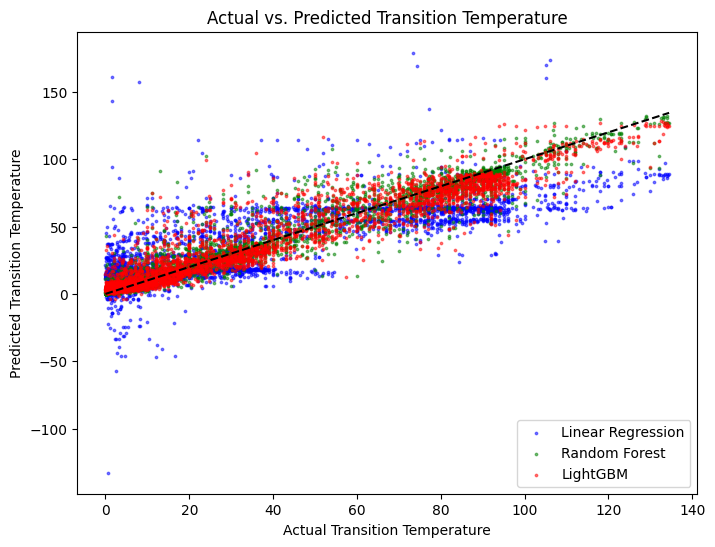

#--------------------------------------------
# Comparison of different models
#--------------------------------------------
               Model  Mean Squared Error (MSE)  R-squared (R²)
0  Linear Regression                401.217412        0.651443
1      Random Forest                 82.248159        0.928547
2           LightGBM                106.941205        0.907095


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("unique_m.csv")

# Extract features (elemental compositions) and target (transition temperature)
X = data.iloc[:, :-2].values  # Exclude the last two columns
y = data.iloc[:, -2].values  # Second last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Create and train the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Create and train the LightGBM regression model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Calculate mean squared error (MSE) and R-squared (R²) for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print the results
print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R-squared (R²): {r2_linear:.2f}")

print("\nRandom Forest:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")

print("\nLightGBM:")
print(f"Mean Squared Error (MSE): {mse_lgb:.2f}")
print(f"R-squared (R²): {r2_lgb:.2f}")

# Find the highest transition temperature and its corresponding composition
highest_temperature = y_test.max()
highest_temperature_index = np.argmax(y_test)
highest_temperature_composition = data.iloc[highest_temperature_index, :-2].to_dict()

print(f"\nHighest Transition Temperature: {highest_temperature:.2f} K")
print("Composition with Highest Transition Temperature:")

# Define a dictionary of element symbols (keys) and their corresponding counts (values)
element_counts = highest_temperature_composition

# Convert the dictionary into a chemical formula with subscripts
chemical_formula = ""
for element, count in element_counts.items():
    if count > 0:
        chemical_formula += element + str(count) if count >=0 else element + f"_{count}"

print(f"Chemical Formula: {chemical_formula}")

# Create a scatter plot of actual vs. predicted temperatures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, c='b', alpha=0.5, s=3, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, c='g', alpha=0.5, s=3, label='Random Forest')
plt.scatter(y_test, y_pred_lgb, c='r', alpha=0.5, s=3, label='LightGBM')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel("Actual Transition Temperature")
plt.ylabel("Predicted Transition Temperature")
plt.title("Actual vs. Predicted Transition Temperature")
plt.legend()
plt.show()

print('#--------------------------------------------')
print('# Comparison of different models')
print('#--------------------------------------------')
# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'LightGBM'],
    'Mean Squared Error (MSE)': [mse_linear, mse_rf, mse_lgb],
    'R-squared (R²)': [r2_linear, r2_rf, r2_lgb]
})

# Print the results in tabular format
print(results_df)

Include 5 different ML models and compare the results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4259
[LightGBM] [Info] Number of data points in the train set: 17010, number of used features: 77
[LightGBM] [Info] Start training from score 34.533301
Results for Different Regression Models:
                    Model  Mean Squared Error (MSE)  R-squared (R²)
0       Linear Regression                401.217412        0.651443
1           Random Forest                 82.248159        0.928547
2  Support Vector Machine                301.843033        0.737774
3                 XGBoost                 93.880718        0.918441
4                LightGBM                106.941205        0.907095


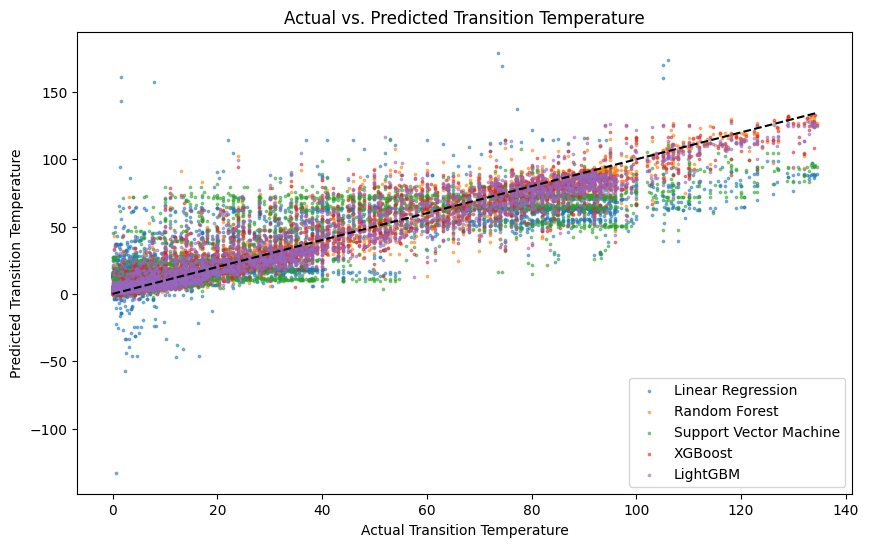

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("unique_m.csv")

# Extract features (elemental compositions) and target (transition temperature)
X = data.iloc[:, :-2].values  # Exclude the last two columns
y = data.iloc[:, -2].values  # Second last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([model_name, mse, r2])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Mean Squared Error (MSE)', 'R-squared (R²)'])

# Print the results in tabular format
print("Results for Different Regression Models:")
print(results_df)

# Create a scatter plot of actual vs. predicted temperatures for each model
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, s=3, label=model_name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel("Actual Transition Temperature")
plt.ylabel("Predicted Transition Temperature")
plt.title("Actual vs. Predicted Transition Temperature")
plt.legend()
plt.show()


Results for Linear Regression:
Mean Squared Error (MSE): 401.22
R-squared (R²): 0.65


Results for Random Forest:
Mean Squared Error (MSE): 82.25
R-squared (R²): 0.93


Results for Support Vector Machine:
Mean Squared Error (MSE): 301.84
R-squared (R²): 0.74


Results for XGBoost:
Mean Squared Error (MSE): 93.88
R-squared (R²): 0.92


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4259
[LightGBM] [Info] Number of data points in the train set: 17010, number of used features: 77
[LightGBM] [Info] Start training from score 34.533301
Results for LightGBM:
Mean Squared Error (MSE): 106.94
R-squared (R²): 0.91


Results for Different Regression Models:
                    Model  Mean Squared Error (MSE)  R-squared (R²)
0       Linear Regression                401.217412        0.651443
1

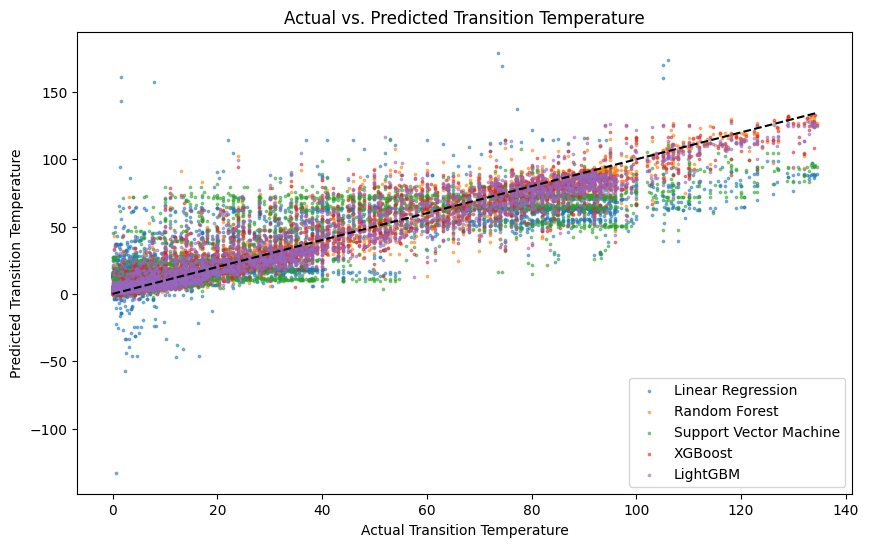

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("unique_m.csv")

# Extract features (elemental compositions) and target (transition temperature)
X = data.iloc[:, :-2].values  # Exclude the last two columns
y = data.iloc[:, -2].values  # Second last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([model_name, mse, r2])

    # Print the results for the current model
    print(f"Results for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("\n")

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Mean Squared Error (MSE)', 'R-squared (R²)'])

# Print the results in tabular format
print("Results for Different Regression Models:")
print(results_df)

# Create a scatter plot of actual vs. predicted temperatures for each model
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, s=3, label=model_name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel("Actual Transition Temperature")
plt.ylabel("Predicted Transition Temperature")
plt.title("Actual vs. Predicted Transition Temperature")
plt.legend()
plt.show()


Print which is the best suited model (lowest MSE and the highest R² is the best-suited model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4259
[LightGBM] [Info] Number of data points in the train set: 17010, number of used features: 77
[LightGBM] [Info] Start training from score 34.533301
-------------------------------------------
Results for Different Regression Models:
-------------------------------------------
                    Model  Mean Squared Error (MSE)  R-squared (R²)  \
0       Linear Regression                401.217412        0.651443   
1           Random Forest                 82.248159        0.928547   
2  Support Vector Machine                301.843033        0.737774   
3                 XGBoost                 93.880718        0.918441   
4                LightGBM                106.941205        0.907095   

   Highest Temperature               

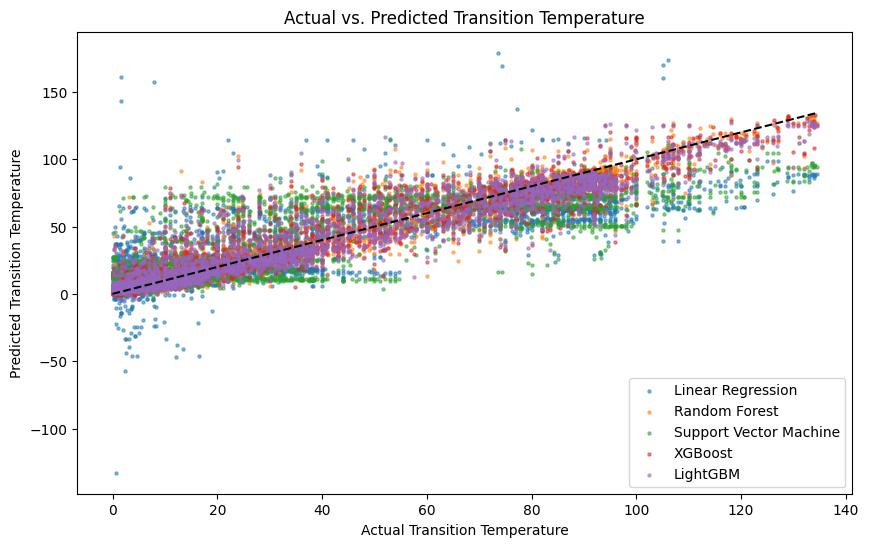

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("unique_m.csv")

# Extract features (elemental compositions) and target (transition temperature)
X = data.iloc[:, :-2].values  # Exclude the last two columns
y = data.iloc[:, -2].values  # Second last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Find the highest transition temperature and its corresponding composition
    highest_temperature = y_test.max()
    highest_temperature_index = np.argmax(y_test)
    highest_temperature_composition = data.iloc[highest_temperature_index, :-2].to_dict()

    # Filter out non-zero elements in the composition
    non_zero_composition = {element: count for element, count in highest_temperature_composition.items() if count != 0}

    results.append([model_name, mse, r2, highest_temperature, non_zero_composition])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Mean Squared Error (MSE)', 'R-squared (R²)', 'Highest Temperature', 'Composition'])

# Find the best-suited model based on the lowest MSE and highest R²
best_model_mse = results_df['Mean Squared Error (MSE)'].idxmin()
best_model_r2 = results_df['R-squared (R²)'].idxmax()
best_mse_model_name = results_df.loc[best_model_mse, 'Model']
best_r2_model_name = results_df.loc[best_model_r2, 'Model']

# Print the results and best-suited model
print("-------------------------------------------")
print("Results for Different Regression Models:")
print("-------------------------------------------")
print(results_df)
print(f"**Lowest MSE** and the **highest R²** is the best-suited model")
print("\nBest Model Based on Mean Squared Error (MSE):", best_mse_model_name)
print("Best Model Based on R-squared (R²):", best_r2_model_name)

# Create a scatter plot of actual vs. predicted temperatures for each model
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, s=5, label=model_name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel("Actual Transition Temperature")
plt.ylabel("Predicted Transition Temperature")
plt.title("Actual vs. Predicted Transition Temperature")
plt.legend()
plt.show()
